# Evaluation of LES against satellite and ground-based observations
* The below notebook compares selected simulations against observational targets that were collected from satellite and ground-based retrievals.
* In case of questions or concerns, please notify Ann Fridlind (ann.fridlind@nasa.gov), Timothy Juliano (tjuliano@ucar.edu), and Florian Tornow (ft2544@columbia.edu).

In [132]:
%run functions_plotting.py

## select simulations to plot
sim_keyword = 'dx100' 

In [130]:
## load ERA5 fields
era5_1d, era5_2d = load_era5(PATH='../../data_files/')

## load radiosondes
rs_dat = load_rs(t_filter = 6.)

## load DOE ARM site statistics
kazrkollias_dat = load_kazrkollias(aux_dat=rs_dat) ## here using radiosonde profiles to estimate CTT
kazrclough_dat = load_kazrclough() 
aeri_dat = load_aeri(t_filter = 0.5)
radflux_dat = load_radflux()
srfflux_dat = load_flux()

## load MAC-LWP
maclwp_dat = load_maclwp(t_filter = 0.) 
gongiwp_dat = load_iwpgong(t_filter = 0.)

## load MODIS, VIIRS, and SENTINEL retrievals
modis_dat    = load_modis(t_filter = 0.,sza_filter = 65.)
viirs_dat    = load_viirs(t_filter = 0.,sza_filter = 65.)
sentinel_dat = load_sentinel(t_filter = 0.,sza_filter = 65.)

## load CERES retrievals
ceres_dat = load_ceres(t_filter = 0.)

## load CALIPSO retrievals (note the increased time window)
calipso_dat = load_calipso(t_filter = 3.)

../../data_files/theta_temp_rh_sh_uvw_sst_along_trajectory_era5ml_28h_end_2020-03-13-18.nc
../../data_files/anxsondewnpnM1.b1.20200313.232200.cdf
../../data_files/anxsondewnpnM1.b1.20200313.172600.cdf
../../data_files/anxsondewnpnM1.b1.20200313.112600.cdf
../../data_files/anxsondewnpnM1.b1.20200313.052700.cdf
KAZR (Kollias): here using auxiliary field to estimate cloud-top temperature


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition

In [124]:
## load all simulations located in subfolders of the given directory
var_vec_1d = ['hfss','hfls','ts'] # variables with ERA5 (longer time axis)
var_vec_2d = ['theta','qv','ua','va']
df_col_1d,df_col_2d = load_sims('../../output_les/',var_vec_1d,var_vec_2d,t_shift=-2,keyword=sim_keyword)

Loading variables: f(time)
../../output_les/dharma/sandbox/DHARMA_Lx25km_dx100_FixN.nc
../../output_les/dharma/sandbox/DHARMA_Lx25km_dx100_ProgNa.nc
../../output_les/wrf/sandbox/WRF_Lx25_dx100_FixN_noice.nc
../../output_les/wrf/sandbox/WRF_Lx25_dx100_FixN_def_z0.nc
../../output_les/wrf/sandbox/WRF_Lx25_dx100_FixN.nc
Loading variables: f(time,height)
../../output_les/dharma/sandbox/DHARMA_Lx25km_dx100_FixN.nc
../../output_les/dharma/sandbox/DHARMA_Lx25km_dx100_ProgNa.nc
../../output_les/wrf/sandbox/WRF_Lx25_dx100_FixN_noice.nc
../../output_les/wrf/sandbox/WRF_Lx25_dx100_FixN_def_z0.nc
../../output_les/wrf/sandbox/WRF_Lx25_dx100_FixN.nc


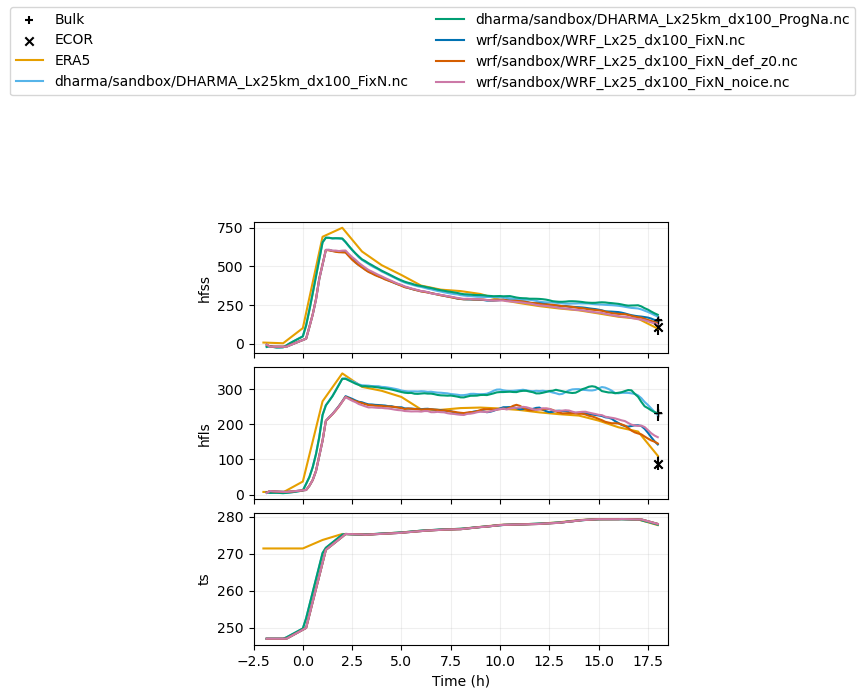

In [125]:
## plot variables that have only time dependence
plot_1d(pd.concat([df_col_1d,era5_1d,srfflux_dat]),var_vec_1d)

In [133]:
## load all simulations located in subfolders of the given directory
var_vec_1d = ['lwpr','lwpc','iwp','od'] # variables without ERA5 (shorter time axis)
var_vec_2d = ['theta','qv','ua','va','ta']
df_col_1d,df_col_2d = load_sims('../../output_les/',var_vec_1d,var_vec_2d,t_shift=-2,keyword=sim_keyword,diag_zi_ctt=True)

Loading variables: f(time)
../../output_les/dharma/sandbox/DHARMA_Lx25km_dx100_FixN.nc
../../output_les/dharma/sandbox/DHARMA_Lx25km_dx100_ProgNa.nc
../../output_les/wrf/sandbox/WRF_Lx25_dx100_FixN_noice.nc
lwpr not found in ../../output_les/wrf/sandbox/WRF_Lx25_dx100_FixN_noice.nc
lwpc not found in ../../output_les/wrf/sandbox/WRF_Lx25_dx100_FixN_noice.nc
../../output_les/wrf/sandbox/WRF_Lx25_dx100_FixN_def_z0.nc
lwpr not found in ../../output_les/wrf/sandbox/WRF_Lx25_dx100_FixN_def_z0.nc
lwpc not found in ../../output_les/wrf/sandbox/WRF_Lx25_dx100_FixN_def_z0.nc
../../output_les/wrf/sandbox/WRF_Lx25_dx100_FixN.nc
lwpr not found in ../../output_les/wrf/sandbox/WRF_Lx25_dx100_FixN.nc
lwpc not found in ../../output_les/wrf/sandbox/WRF_Lx25_dx100_FixN.nc
Loading variables: f(time,height)
../../output_les/dharma/sandbox/DHARMA_Lx25km_dx100_FixN.nc
../../output_les/dharma/sandbox/DHARMA_Lx25km_dx100_ProgNa.nc
../../output_les/wrf/sandbox/WRF_Lx25_dx100_FixN_noice.nc
../../output_les/wrf/s

/opt/conda/lib/python3.10/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/opt/conda/lib/python3.10/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


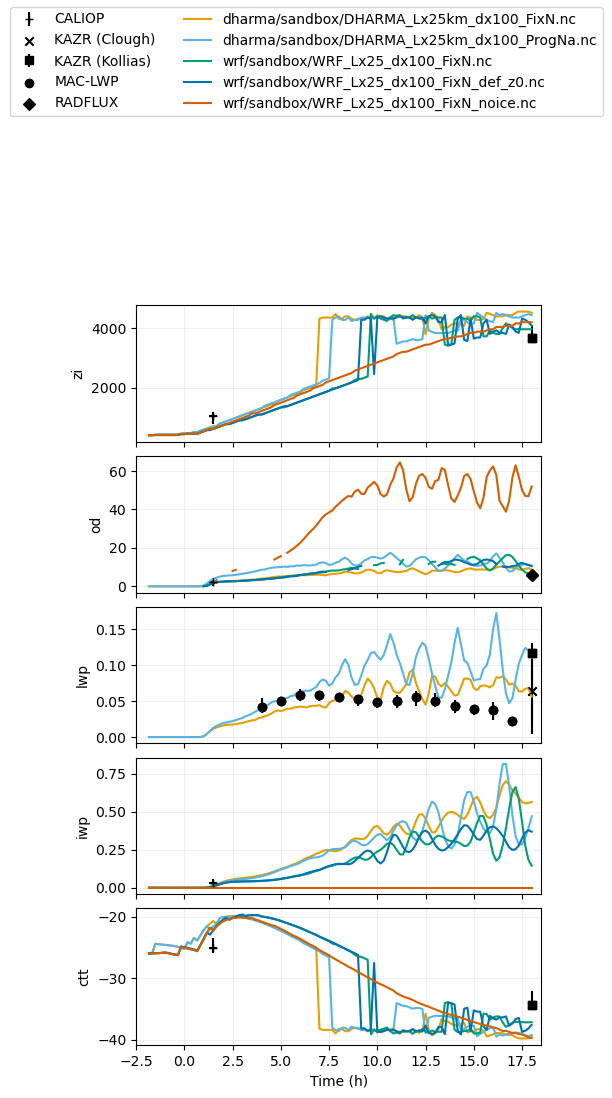

In [134]:
## plot variables that have only time dependence
#plot_1d(pd.concat([df_col_1d,maclwp_dat,modis_dat,viirs_dat,sentinel_dat,kazrkollias_dat,kazrclough_dat,calipso_dat,radflux_dat]),['zi','od','lwp','iwp','ctt'])
plot_1d(pd.concat([df_col_1d,maclwp_dat,kazrkollias_dat,kazrclough_dat,calipso_dat,radflux_dat]),['zi','od','lwp','iwp','ctt'])

## plot variables that have only time dependence (for now excluding imager retrievals that are mostly SZA > 70)
#plot_1d(pd.concat([df_col_1d,maclwp_dat,kazrkollias_dat,kazrclough_dat,calipso_dat,gongiwp_dat,radflux_dat]),['od','lwp','iwp']) #'zi','od','lwp','iwp

Computing wind speed
Computing wind direction


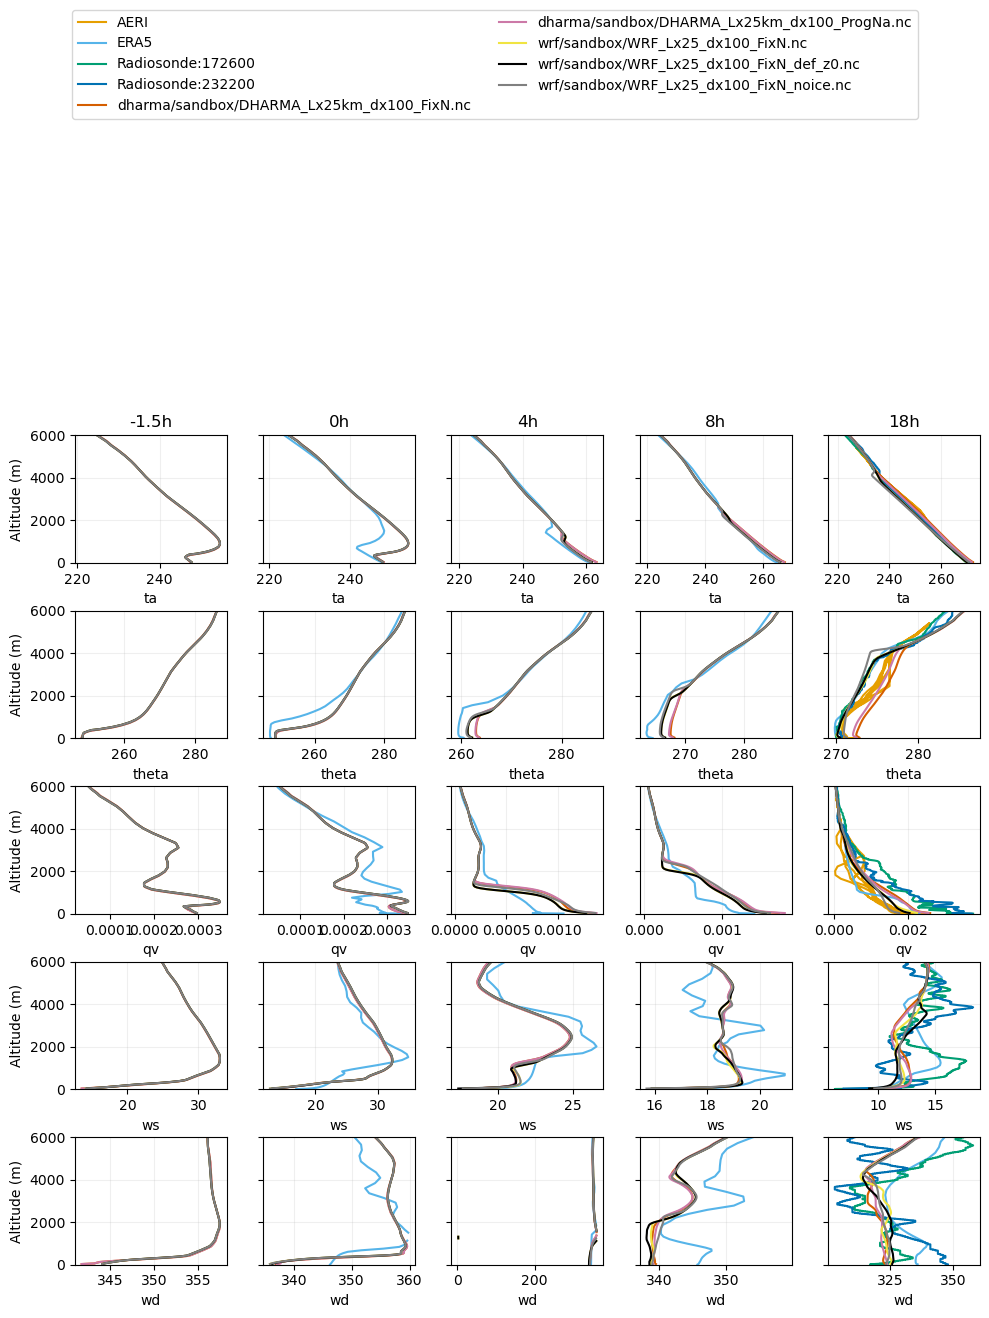

<Figure size 1000x600 with 0 Axes>

In [102]:
## plot all variables that have time and height dependence
#plot_2d(df_col_2d,var_vec_2d,[0,3,6,9,12,15,18],z_max=6000)

## example where ERA5 and radiosonde are included
plot_2d(pd.concat([df_col_2d,era5_2d,rs_dat,aeri_dat]),var_vec = ['ta','theta','qv','ws','wd'],times=[-1.5,0,4,8,18],z_max=6000)